# Heart Attack Predictior/Analysis
By: Zaine Ancheta

## Background

Description:
A heart attack, or more scientifically known as a myocardial infarction, is when the heart muscles fail due to lack of blood supply because of blood flow restriction or blockage to the heart.

### Dataset Sources

The dataset was created by:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

The dataset is collected from the following sources:
- Cleveland Clinic Foundation (cleveland.data)
- Hungarian Institute of Cardiology, Budapest (hungarian.data)
- V.A. Medical Center, Long Beach, CA (long-beach-va.data)
- University Hospital, Zurich, Switzerland (switzerland.data)

The dataset was obtained through kaggle.com and was created by Nikhil Anand.

### Content and Goals
The dataset contains 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. The goal of thisd analysis is to accurately predict whether or not a patient has heart disease using the provided attributes. The analysis will also provide insights and help with properly diagnosing a patient.



### Column Descriptions

- age: Age in years of patient
- sex: Patient gender
- exang: Exercise induced angina (1 = yes; 0 = no)
- ca: # of major vessels (0-3)
- cp: Type of chest pain (types = 1-4)
    - 1 = Typical Angina
    - 2 = Atypical Angina
    - 3 = Non-Anginal Pain
    - 4 = Asymptomatic
- trtbps: Resting blood pressure (mm Hg)
- chol: Cholesterol level (mg/dl)
- fbs: fasting blood sugar > 120 mg/dl  (1 = yes; 0 = no)
- rest_ecg: Resting electrocardiographic results (types = 0-2)
    - 0: Normal
    - 1: ST-T wave abnormality
    - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: Max heart rate achieved
- target: 0 = less likely of heart attack, 1 = more likely of heart attack




### Library Imports

The following libraries will be used for this project:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Exploratory Data Analysis

Reading the dataset:

In [6]:
df = pd.read_csv("heart_health.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [8]:
df.shape
# (Rows, Columns)

(294, 14)

In [11]:
print(df.isnull().sum())
# Checks for amount of NA values in dataset

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


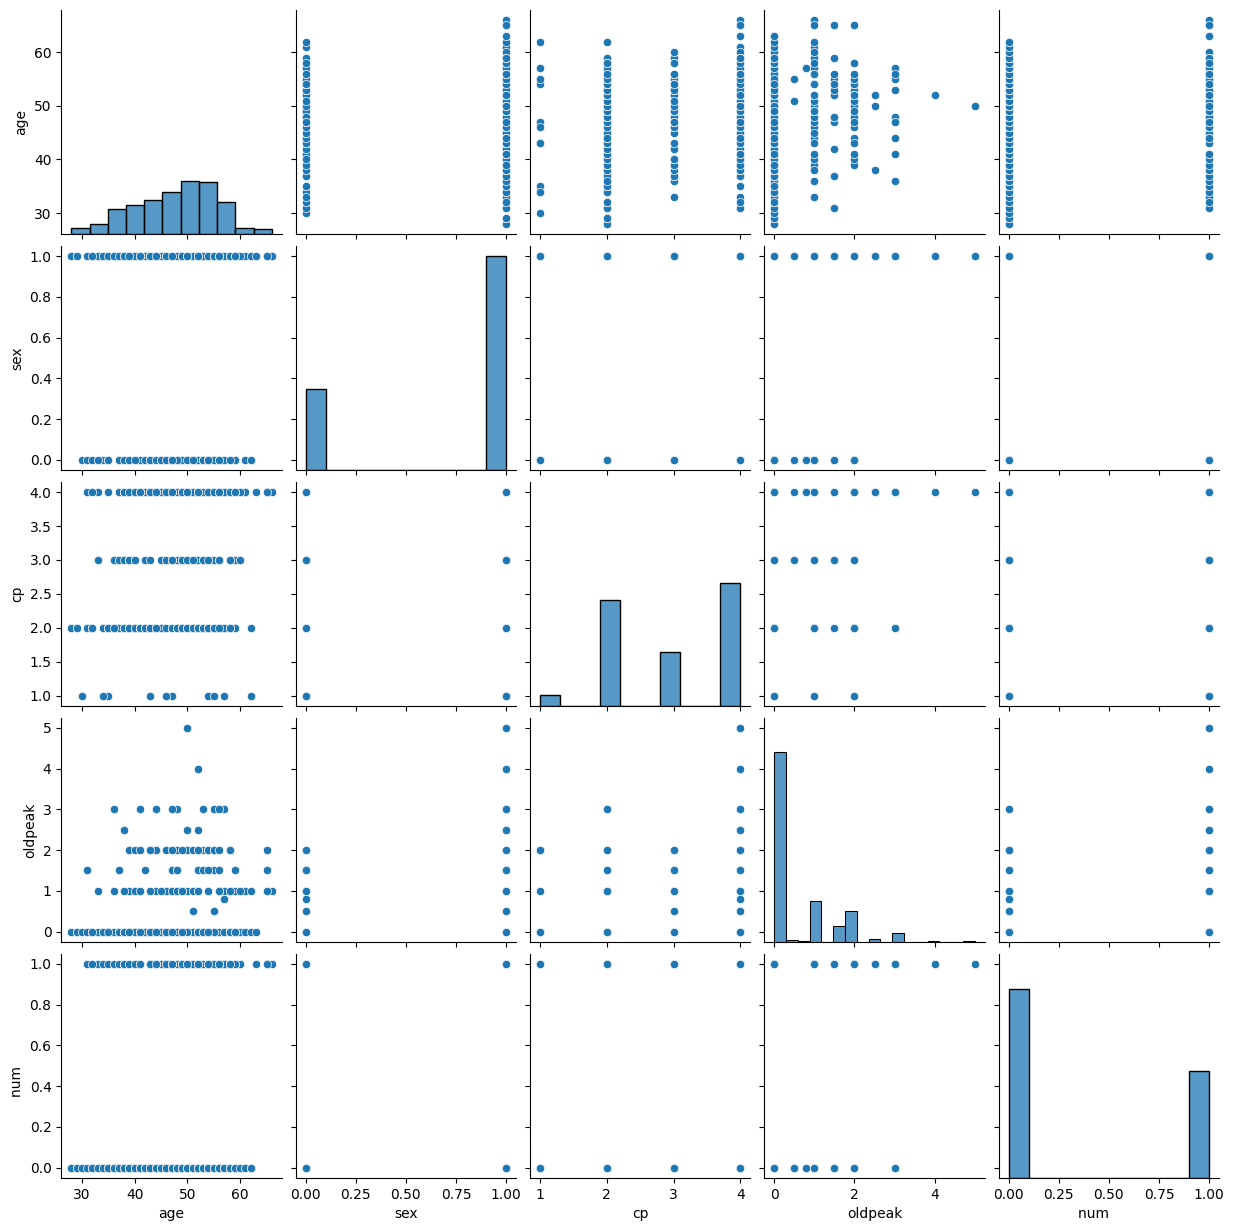

In [13]:
sns.pairplot(df)

### Data Cleaning/Preprocessing